In [228]:
from actions import ActionsWorkflow, ActionsJobs, ActionsArtifacts
import LogExtractor as extractor

from reportlab.lib.pagesizes import A4
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, TableStyle, Spacer, ListFlowable, ListItem
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## Retrieving test data and processing 

In [2]:
repo_path = 'MagaluCloud/s3-specs'
query_size = 10


In [3]:

workflow = ActionsWorkflow(repository=repo_path, query_size=query_size)
jobs = ActionsJobs(repo_path, workflow)

all_workflows_jobs = pd.DataFrame()

for id in workflow.df['databaseId']:
    tmp = jobs.get_jobs(id)
    all_workflows_jobs = pd.concat([all_workflows_jobs, tmp])

DataFrame successfully saved to ./bin/actionsWorflow.parquet


In [4]:
artifacts = ActionsArtifacts(repository=repo_path)
all_tests_df = pd.DataFrame()
all_times_df = pd.DataFrame()
all_failures_df = pd.DataFrame()

for path in artifacts.paths:
    artifact = extractor.PytestArtifactLogExtractor(path)
    pytest_tests_status	, pytest_run_times, pytest_failures_errors = artifact.log_to_df()
    all_tests_df = pd.concat([all_tests_df, pytest_tests_status])
    all_times_df = pd.concat([all_times_df, pytest_run_times])
    all_failures_df = pd.concat([all_failures_df, pytest_failures_errors])

In [68]:
# Trocar databaseId por jobId
display(all_tests_df)
display(all_times_df[all_times_df['databaseId'].notna()])
display(all_failures_df)

status  \
pytest_tests_status                                          
test_boto_upload_object_with_cold_storage_class     PASSED   
test_boto_object_with_custom_metadata_acls_and_...  PASSED   
test_boto_list_objects_with_cold_storage_class      PASSED   
test_boto_change_object_class_to_cold_storage       PASSED   
test_boto_multipart_upload_with_cold_storage_class  PASSED   
...                                                    ...   
test_delete_bucket_with_objects_with_versions       PASSED   
test_delete_bucket_with_objects_with_versions       PASSED   
test_delete_bucket_with_objects_with_versions       PASSED   
test_delete_object_with_versions                    PASSED   
test_delete_bucket_with_objects_with_versions       PASSED   

                                                                  category  \
pytest_tests_status                                                          
test_boto_upload_object_with_cold_storage_class       cold_storage_test.py   
test_boto_object_with_custom_metadata_acls_and_...    cold_storage_test.py   
test_boto_list_objects_with_cold_storage_class        cold_storage_test.py   
test_boto_change_object_class_to_cold_storage         cold_storage_test.py   
test_boto_multipart_upload_with_cold_storage_class    cold_storage_test.py   
...                                                                    ...   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_object_with_versions                        versioning_test.py   
test_delete_bucket_with_objects_with_versions           versioning_test.py   

                                                                                            arguments  \
pytest_tests_status                                                                                     
test_boto_upload_object_with_cold_storage_class                                                  None   
test_boto_object_with_custom_metadata_acls_and_...                                               None   
test_boto_list_objects_with_cold_storage_class                                                   None   
test_boto_change_object_class_to_cold_storage                                                    None   
test_boto_multipart_upload_with_cold_storage_class                                               None   
...                                                                                               ...   
test_delete_bucket_with_objects_with_versions       mgc object-storage buckets delete {bucket_name...   
test_delete_bucket_with_objects_with_versions       rclone rmdir {profile_name}:{bucket_name}-Buck...   
test_delete_bucket_with_objects_with_versions       aws --profile {profile_name} s3 rb s3://{bucke...   
test_delete_object_with_versions                                                                 None   
test_delete_bucket_with_objects_with_versions                                                    None   

                                                     databaseId  
pytest_tests_status                                              
test_boto_upload_object_with_cold_storage_class               0  
test_boto_object_with_custom_metadata_acls_and_...            0  
test_boto_list_objects_with_cold_storage_class                0  
test_boto_change_object_class_to_cold_storage                 0  
test_boto_multipart_upload_with_cold_storage_class            0  
...                                                         ...  
test_delete_bucket_with_objects_with_versions       13269265723  
test_delete_bucket_with_objects_with_versions       13269265723  
test_delete_bucket_with_objects_with_versions       13269265723  
test_delete_object_with_versions                    13269265723  
test_delete_bucket_with_objects_with_versions       13269265723  

[432 

total num    avg    min  \
pytest_run_times                                                               
test_boto_multipart_upload_with_cold_storage_class   2.507   1  2.507  2.507   
test_boto_object_with_custom_metadata_acls_and_...   2.202   1  2.202  2.202   
test_boto_upload_object_with_cold_storage_class      2.143   1  2.143  2.143   
test_boto_change_object_class_to_cold_storage        1.331   1  1.331  1.331   
test_boto_list_objects_with_cold_storage_class       1.121   1  1.121  1.121   
...                                                    ...  ..    ...    ...   
test_delete_bucket_with_objects_with_versions        5.903   4  1.705  0.618   
versioned_bucket_with_one_object                    46.476   8  5.772  5.330   
s3_client                                            1.409   8  0.074  0.067   
active_mgc_workspace                                 0.165   6  0.008  0.008   
test_params                                          0.011   8  0.001  0.001   

                                                           durationType  \
pytest_run_times                                                          
test_boto_multipart_upload_with_cold_storage_class   teardown duration    
test_boto_object_with_custom_metadata_acls_and_...   teardown duration    
test_boto_upload_object_with_cold_storage_class      teardown duration    
test_boto_change_object_class_to_cold_storage        teardown duration    
test_boto_list_objects_with_cold_storage_class       teardown duration    
...                                                                 ...   
test_delete_bucket_with_objects_with_versions            call duration    
versioned_bucket_with_one_object                      fixture duration    
s3_client                                             fixture duration    
active_mgc_workspace                                  fixture duration    
test_params                                           fixture duration    

                                                     databaseId  
pytest_run_times                                                 
test_boto_multipart_upload_with_cold_storage_class            0  
test_boto_object_with_custom_metadata_acls_and_...            0  
test_boto_upload_object_with_cold_storage_class               0  
test_boto_change_object_class_to_cold_storage                 0  
test_boto_list_objects_with_cold_storage_class                0  
...                                                         ...  
test_delete_bucket_with_objects_with_versions       13269265723  
versioned_bucket_with_one_object                    13269265723  
s3_client                                           13269265723  
active_mgc_workspace                                13269265723  
test_params                                         13269265723  

[905 rows x 6 columns]

status                category  \
pytest_failures_errors                                                          
test_delete_object_with_versions               FAILED  versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions  FAILED  versioning_cli_test.py   

                                                        error  \
pytest_failures_errors                                          
test_delete_object_with_versions               AssertionError   
test_delete_bucket_with_objects_with_versions          assert   

                                                                                   error_details  \
pytest_failures_errors                                                                             
test_delete_object_with_versions                Command failed with error: Error: (NoSuchBuck...   
test_delete_bucket_with_objects_with_versions  'the bucket may not be empty' in 'WARN\tgithub...   

                                                databaseId  
pytest_failures_errors                                      
test_delete_object_with_versions               13269149128  
test_delete_bucket_with_objects_with_versions  13269149128

## Creating pdf

In [6]:
pytest_tests_status.index.unique()

Index(['test_delete_object_with_versions', 'test_delete_bucket_with_objects_with_versions'], dtype='object', name='pytest_tests_status')

In [7]:
pytest_run_times.index.unique()

Index(['test_delete_object_with_versions',
       'test_delete_bucket_with_objects_with_versions',
       'versioned_bucket_with_one_object', 's3_client', 'active_mgc_workspace',
       'test_params'],
      dtype='object', name='pytest_run_times')

In [8]:
# Generate a tuple with the category name and the summed up values of all index of said class
def get_time(metric):
    return pd.Series(dict(map(lambda t, x: (x, pytest_run_times.loc[pytest_run_times.index == t, metric].sum()), pytest_tests_status.index.unique(), pytest_tests_status.category.unique())))

total_times = get_time('total')
avg_time_test = get_time('avg')
min_test_time  = get_time('min')

total_nums = pytest_tests_status['category'].value_counts()
total_passed = pytest_tests_status[pytest_tests_status.index.values != 'PASSED'].set_index('category').index.value_counts()
time_count_df = pd.concat([total_passed, total_nums - total_passed, total_nums, min_test_time, avg_time_test, total_times], axis=1)
time_count_df.columns = ['num_passed', 'num_failed', 'total_runs', 'min_test_time', 'avg_test_time', 'total_duration']

report_df = pd.DataFrame()
report_df['name'] = pytest_tests_status['category'].unique()
report_df = report_df.set_index('name')

report_df = pd.concat([report_df, time_count_df], axis=1)
report_df

num_passed  num_failed  total_runs  min_test_time  \
versioning_cli_test.py           6           0           6         13.462   
versioning_test.py               2           0           2         12.627   

                        avg_test_time  total_duration  
versioning_cli_test.py         14.733          60.838  
versioning_test.py             13.958          55.716

In [28]:
# Generate tuple with error values 
errors_df = all_failures_df
errors_df

status                category  \
pytest_failures_errors                                                          
test_delete_object_with_versions               FAILED  versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions  FAILED  versioning_cli_test.py   

                                                        error  \
pytest_failures_errors                                          
test_delete_object_with_versions               AssertionError   
test_delete_bucket_with_objects_with_versions          assert   

                                                                                   error_details  \
pytest_failures_errors                                                                             
test_delete_object_with_versions                Command failed with error: Error: (NoSuchBuck...   
test_delete_bucket_with_objects_with_versions  'the bucket may not be empty' in 'WARN\tgithub...   

                                                databaseId  
pytest_failures_errors                                      
test_delete_object_with_versions               13269149128  
test_delete_bucket_with_objects_with_versions  13269149128

Blocos que vão existir

Topo: Contendo Informações básicas do relatório e se possível alguns campos em branco e também a data de quando o código foi executado

Texto: Informações gerais do número de acertos e erros

Tabela: Contem o dataframe report_df, mas estilizado

Gráficos: fica pra dps

In [43]:
df = report_df.reset_index().round(2)
# Function to create PDF
def create_pdf(df, df_errors):
    # A4 size dimensions
    width, height = A4

    # Set 10% margin
    margin = 0.1 * width

    # Create PDF with margins
    doc = SimpleDocTemplate("report_v0.pdf", pagesize=A4,
                            leftMargin=margin, rightMargin=margin, topMargin=0.1*height, bottomMargin=0.1*height)

    # Styles
    styles = getSampleStyleSheet()
    heading_style = styles['Heading1']
    normal_style = styles['Normal']
    normal_style.alignment = 0  # 0 for left alignment

    bold_style = ParagraphStyle(
        name="Bold",
        parent=normal_style,
        fontName="Helvetica-Bold",
        fontSize=12
    )

    # Create the story (content) for the PDF
    story = []

    # Add title with fields
    story.extend(create_title(heading_style,normal_style))

    # Add each section to the story
    story.extend(create_execution_summary(df, normal_style, bold_style))
    story.extend(create_detailed_results(df, normal_style, bold_style, width, margin))
    story.extend(create_errors_summary(df_errors, normal_style, bold_style, width, margin))

    # Build PDF
    doc.build(story)

# Function to create the title zone and text on the pdf
def create_title(heading_style, normal_style):
    # Initialize the story list
    story = []

    # Get current date and time
    agora = datetime.now()
    horario_dia = agora.strftime("%d/%m/%Y %H:%M:%S")

    # Create the title
    title_text = "Sumário de Resultados dos Testes"
    title_paragraph = Paragraph(f"<b>{title_text}</b>", heading_style)

    # Create the formatted text for the execution date on the right side
    right_date_style = ParagraphStyle(
        "RightDateStyle", parent=normal_style, alignment=2, fontSize=10
    )
    date_paragraph = Paragraph(horario_dia, right_date_style)

    # Add title and date to the story as separate elements
    story.append(title_paragraph)
    story.append(date_paragraph)

    # Create the formatted text for the execution date, system version, and environment
    execution_paragraph = Paragraph(f"Data da Execução: ", normal_style)
    version_paragraph = Paragraph("Versão do Sistema: ", normal_style)
    environment_paragraph = Paragraph("Ambiente: ", normal_style)

    # Add other paragraphs to the story
    story.append(execution_paragraph)
    story.append(Spacer(1, 12))  # Spacer between execution and version
    story.append(version_paragraph)
    story.append(Spacer(1, 12))  # Spacer between version and environment
    story.append(environment_paragraph)

    story.append(Spacer(1, 24))  # Add space at the end

    # Return the complete story
    return story

# Function to create execution summary table with bullet points
def create_execution_summary(df, normal_style, bold_style):
    story = []
    story.append(Paragraph("Resumo Geral", bold_style))
    story.append(Spacer(1, 6))

    # Criando a lista de resumo corretamente
    summary_data = {
        'Total de Testes:': df['total_runs'].sum(),
        'Testes Bem-Sucedidos:': df['num_passed'].sum(),
        'Testes com Falha:': df['num_failed'].sum(),
        'Tempo Mínimo de Execução:': f"{df['min_test_time'].min():.2f} s",
        'Tempo Médio de Execução:': f"{df['avg_test_time'].mean():.2f} s",
        'Duração Total dos Testes:': f"{df['total_duration'].sum():.2f} s"
    }

    # Criando a lista com bullet points
    bullet_points = [
        ListItem(Paragraph(f"<b>{key}</b> {value}", normal_style), leftIndent=20, spaceAfter=6)
        for key, value in summary_data.items()
    ]

    # Criando o ListFlowable
    list_flowable = ListFlowable(bullet_points, bulletType='bullet', leftIndent=20)

    # Adicionando ao relatório
    story.append(list_flowable)
    story.append(Spacer(1, 24))

    return story

# Function to create detailed results table
def create_detailed_results(df, normal_style, bold_style, width, margin):
    story = []
    story.append(Paragraph("Detalhamento dos Testes", bold_style))
    story.append(Spacer(1, 12))
    df_renamed = df.copy()  # Create a copy of the DataFrame
    df_renamed.columns = [
        'Categoria de Teste', 
        'Testes Bem-Sucedidos', 
        'Falhas', 
        'Execuções', 
        'Tempo Mínimo de Execução', 
        'Tempo Médio', 
        'Duração Total'
    ]


    # Dropping the specified columns
    df_renamed = df_renamed.drop(columns=['Testes Bem-Sucedidos', 'Tempo Mínimo de Execução'])

    df_renamed['Tempo Médio'] = df_renamed['Tempo Médio'].astype(str) + ' sec'
    df_renamed['Duração Total'] = df_renamed['Duração Total'].astype(str) + ' sec'

    # Prepare the detailed data for the table
    detailed_tests_data = [df_renamed.columns.tolist()]  # Add header
    detailed_tests_data.extend(
        [[Paragraph(str(value), normal_style) for value in row] for row in df_renamed.values.tolist()]
    )

    # Calculate available width after applying margins
    available_width = width - 2 * margin  # Subtracting left and right margins

    # Define column proportions
    proportions = [0.3, 0.15, 0.15, 0.15, 0.2]  # Example proportions

    total_proportion = sum(proportions)
    if total_proportion > 1:
        proportions = [p / total_proportion for p in proportions]  # Scale proportions to fit within 1

    # Calculate column widths based on the available width
    col_widths = [available_width * p for p in proportions]

    # Create the table
    detailed_table = Table(detailed_tests_data, colWidths=col_widths)
    detailed_table.setStyle(TableStyle([('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                        ('GRID', (0, 0), (-1, -1), 0.5, colors.black)]))
    story.append(detailed_table)
    story.append(Spacer(1, 24))

    return story


def create_errors_summary(df, normal_style, bold_style, width, margin):
    """
    Creates a summary of errors in a PDF document.

    :param df: DataFrame containing error data.
    :param normal_style: Style for normal text.
    :param bold_style: Style for bold text.
    :param width: Width of the page.
    :param margin: Margin size.
    :return: A list of elements to be added to the PDF.
    """
    story = []
    story.append(Paragraph("Resumo dos Erros", bold_style))
    story.append(Spacer(1, 12))

    # Create a copy of the DataFrame and reset the index
    df_copy = df.copy().reset_index()
    df_copy.columns = [
        'Nome',
        'Status',
        'Categoria do Teste',
        'Tipo de erro',
        'Detalhes do erro (100 caracteres)',
        'JobId',
    ]

    df_copy = df_copy.drop('Detalhes do erro (100 caracteres)', axis=1)
    display(df_copy)


    # Prepare the detailed data for the table
    detailed_tests_data = [[Paragraph(str(value), normal_style) for value in df_copy.columns.tolist()]]  # Add header
    detailed_tests_data.extend(
        [[Paragraph(str(value), normal_style) for value in row] for row in df_copy.values.tolist()]
    )

    # Calculate available width after applying margins
    available_width = width - 2 * margin  # Subtracting left and right margins

    # Define column proportions
    proportions = [0.3, 0.15, 0.15, 0.15, 0.2, 0.1]  # Example proportions

    # Calculate column widths based on the available width
    col_widths = [available_width * p for p in proportions]

    # Create the table
    detailed_table = Table(detailed_tests_data, colWidths=col_widths)
    detailed_table.setStyle(TableStyle([
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center-align all cells
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),  # Add grid lines
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),  # Bold header font
    ]))
    story.append(detailed_table)
    story.append(Spacer(1, 24))

    return story

# Gerar o PDF
create_pdf(df, errors_df)


Nome  Status  \
0               test_delete_object_with_versions  FAILED   
1  test_delete_bucket_with_objects_with_versions  FAILED   

       Categoria do Teste    Tipo de erro        JobId  
0  versioning_cli_test.py  AssertionError  13269149128  
1  versioning_cli_test.py          assert  13269149128

## Plotting

### Error distribution (Pie chart)

In [233]:
error_distribution_df = all_tests_df[['category', 'status']]
error_passed_info = error_distribution_df.groupby(['status','category']).value_counts()
error_distribution_df

category  \
pytest_tests_status                                                          
test_boto_upload_object_with_cold_storage_class       cold_storage_test.py   
test_boto_object_with_custom_metadata_acls_and_...    cold_storage_test.py   
test_boto_list_objects_with_cold_storage_class        cold_storage_test.py   
test_boto_change_object_class_to_cold_storage         cold_storage_test.py   
test_boto_multipart_upload_with_cold_storage_class    cold_storage_test.py   
...                                                                    ...   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_bucket_with_objects_with_versions       versioning_cli_test.py   
test_delete_object_with_versions                        versioning_test.py   
test_delete_bucket_with_objects_with_versions           versioning_test.py   

                                                    status  
pytest_tests_status                                         
test_boto_upload_object_with_cold_storage_class     PASSED  
test_boto_object_with_custom_metadata_acls_and_...  PASSED  
test_boto_list_objects_with_cold_storage_class      PASSED  
test_boto_change_object_class_to_cold_storage       PASSED  
test_boto_multipart_upload_with_cold_storage_class  PASSED  
...                                                    ...  
test_delete_bucket_with_objects_with_versions       PASSED  
test_delete_bucket_with_objects_with_versions       PASSED  
test_delete_bucket_with_objects_with_versions       PASSED  
test_delete_object_with_versions                    PASSED  
test_delete_bucket_with_objects_with_versions       PASSED  

[432 rows x 2 columns]

In [216]:
status_freq_df = pd.concat([error_passed_info.FAILED, error_passed_info.PASSED], axis=1).fillna(0).astype(int)
status_freq_df.columns = ['FAILED','PASSED']
status_freq_df = status_freq_df.reset_index()
status_freq_df

category  FAILED  PASSED
0      versioning_cli_test.py       2      22
1                 acl_test.py       0     232
2        cold_storage_test.py       0      20
3        list-buckets_test.py       0      16
4             locking_test.py       0       4
5            policies_test.py       0      84
6      presigned-urls_test.py       0      12
7   profiles_policies_test.py       0      24
8  unique-bucket-name_test.py       0       8
9          versioning_test.py       0       8

In [261]:
import plotly.express as px

# Filter for FAILED status
failed_df = error_distribution_df[error_distribution_df['status'] == 'FAILED']

# Group by category and count the number of FAILED statuses
failed_counts = failed_df.groupby('category').size().reset_index(name='count')

# Create the pie chart
fig = px.pie(
    failed_counts, 
    names="category",  # Use 'category' for pie slice labels
    values="count",    # Use 'count' for pie slice sizes
    title="Distribution of FAILED Tests by Category",
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig.update_layout(
    width=400,  # Set the width of the plot (in pixels)
    height=400,  # Set the height of the plot (in pixels)
    margin=dict(l=20, r=20, t=40, b=20)  # Adjust margins if needed
)

# Make the pie chart circle bigger by adjusting the marker size
fig.update_traces(
    marker=dict(line=dict(color='white', width=2)),  # Optional: Add a white border
    textposition='inside',  # Display text inside the slices
    textinfo='percent+label'  # Show percentage and label
)


# Show the pie chart
fig.show()

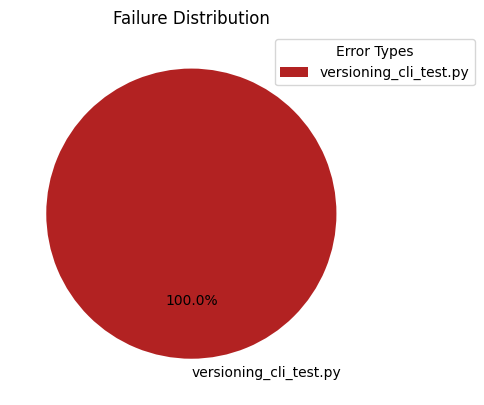

In [262]:
#Failures by Category

plt.figure(figsize=(5, 5))
plt.pie(
    error_passed_info['FAILED'].values,
    labels=error_passed_info['FAILED'].index.to_list(),
    autopct='%1.1f%%',
    startangle=90,
    colors=['firebrick', 'lightgreen', 'lightskyblue'],
)
plt.legend(title="Error Types", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title('Failure Distribution')
plt.tight_layout()
plt.show()




### Proportion of Passed/Failed (%) with Real Values Displayed

In [ ]:

# Calcular totais e percentuais
status_freq_df['Total'] = status_freq_df['PASSED'] + status_freq_df['FAILED']
status_freq_df['PASSED_pct'] = (status_freq_df['PASSED'] / status_freq_df['Total']) * 100
status_freq_df['FAILED_pct'] = (status_freq_df['FAILED'] / status_freq_df['Total']) * 100

# Transformar dados para formato longo
status_freq_long = status_freq_df.melt(
    id_vars=['category'], 
    value_vars=['PASSED_pct', 'FAILED_pct'], 
    var_name='Status', 
    value_name='Percentage'
)

# Criar coluna com valores reais correspondentes
status_freq_long['Real Value'] = status_freq_long.apply(
    lambda row: status_freq_df.loc[status_freq_df['category'] == row['category'], row['Status'].replace('_pct', '')].values[0], 
    axis=1
)

# Criar gráfico
fig = px.bar(
    status_freq_long, 
    x="category", 
    y="Percentage", 
    color="Status", 
    barmode='stack', 
    title="Proportion of Passed/Failed (%) with Real Values Displayed",
    labels={'Percentage': 'Percentage'},
    text=status_freq_long["Real Value"]  # Exibir valores reais nas barras
)

# Ajustar layout para exibir os valores dentro das barras
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_yaxes(title='Percentage')
fig.update_xaxes(title='Category')

fig.show()


### Other plot
